In [15]:
#Uploading my .txt files in Colab
from google.colab import files
uploaded = files.upload()


Saving test.txt to test (4).txt
Saving train.txt to train (4).txt
Saving val.txt to val (4).txt


In [18]:
# Load and clean the datasets manually

import pandas as pd
import io

# Function to load and clean text-label lines safely
def smart_load(file_content, separator=','):
    texts = []
    labels = []
    # Decode the byte content to string and use io.StringIO to treat it as a file
    file_io = io.StringIO(file_content.decode('utf-8'))
    for line in file_io:
        parts = line.strip().split(separator)
        if len(parts) == 2:
            text, label = parts[0].strip(), parts[1].strip()
            if text and label:
                texts.append(text)
                labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

#  Load and clean each file from the 'uploaded' dictionary
# Adjust separator if needed, and handle potential filename variations
train_df = pd.DataFrame({'text': [], 'label': []})
val_df   = pd.DataFrame({'text': [], 'label': []})
test_df  = pd.DataFrame({'text': [], 'label': []})


for name, content in uploaded.items():
    if 'train' in name.lower():
        train_df = smart_load(content, separator=';') # Assuming ';' as separator based on the uploaded content preview
    elif 'val' in name.lower():
        val_df = smart_load(content, separator=';') # Assuming ';' as separator based on the uploaded content preview
    elif 'test' in name.lower():
        test_df = smart_load(content, separator=';') # Assuming ';' as separator based on the uploaded content preview


# 👯 Combine train + validation
combined_train_df = pd.concat([train_df, val_df], ignore_index=True)

In [19]:
# Text preprocessing with TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(combined_train_df['text'])
y_train = combined_train_df['label']

X_test = vectorizer.transform(test_df['text'])
y_test = test_df['label']


In [90]:
# Train and evaluate Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Prediction & Results
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.877

 Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.83      0.85       275
        fear       0.88      0.81      0.84       224
         joy       0.86      0.95      0.91       695
        love       0.83      0.69      0.75       159
     sadness       0.91      0.92      0.91       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.88      2000
   macro avg       0.87      0.79      0.82      2000
weighted avg       0.88      0.88      0.87      2000



<Figure size 800x500 with 0 Axes>

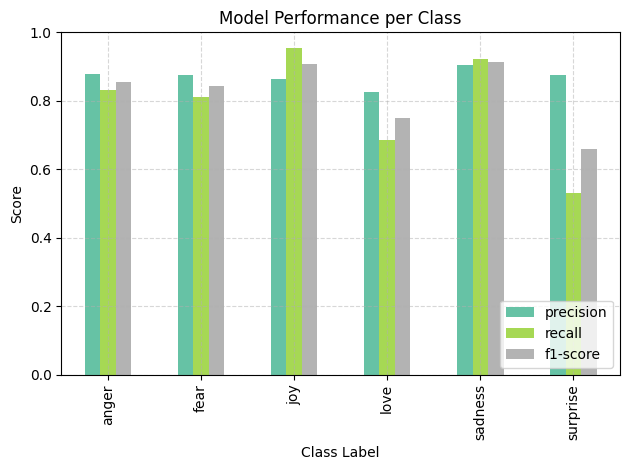

In [97]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Select only classes (not avg/accuracy)
class_metrics = report_df.iloc[:-3][['precision', 'recall', 'f1-score']]

# Plot
plt.figure(figsize=(8, 5))
class_metrics.plot(kind='bar', colormap='Set2')
plt.title("Model Performance per Class")
plt.xlabel("Class Label")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [52]:
#  New text samples to classify
new_texts = [
    "I feel wow and cut cake every day",
    "I'm managing bad and feeling empty",
    "I have no one to care about and i am lonely",
    "I've been feeling really anxious around people",
    "The fact that you’re building something to understand others is beautiful.",
    "You’re not just smart—you’re kind, and this project proves it.",
    "who receive the reply will not feel offended.",
    "I never thought someone could love me this deeply.",
    "i love neglecting this blog but sometimes i feel for my faithful readers.",

     "You remembered my favorite song—I'm speechless.",
    "insults only hurt when they come from somebody you respect damn straight.",
    "i was feeling an act of god at work in my life and it was an amazing feeling.",

    "Every moment with you feels like an unexpected gift."

]

#  Preprocess using the trained TF-IDF vectorizer
new_vectors = vectorizer.transform(new_texts)

#  Predict mental health labels
predictions = model.predict(new_vectors)

#  Show results
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}\nPredicted Label: {label}\n")


Text: I feel wow and cut cake every day
Predicted Label: joy

Text: I'm managing bad and feeling empty
Predicted Label: sadness

Text: I have no one to care about and i am lonely
Predicted Label: sadness

Text: I've been feeling really anxious around people
Predicted Label: fear

Text: The fact that you’re building something to understand others is beautiful.
Predicted Label: sadness

Text: You’re not just smart—you’re kind, and this project proves it.
Predicted Label: joy

Text: who receive the reply will not feel offended.
Predicted Label: anger

Text: I never thought someone could love me this deeply.
Predicted Label: joy

Text: i love neglecting this blog but sometimes i feel for my faithful readers.
Predicted Label: love

Text: You remembered my favorite song—I'm speechless.
Predicted Label: joy

Text: insults only hurt when they come from somebody you respect damn straight.
Predicted Label: sadness

Text: i was feeling an act of god at work in my life and it was an amazing feelin

In [40]:
def classify_mental_health(text):
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]

# Example usage:
result = classify_mental_health("Lately I've been feeling really anxious around people.")
print("Predicted Label:", result)
result = classify_mental_health("Today I have completed my project and I will get a Certificate very soon.")
print("Predicted Label:", result)


Predicted Label: fear
Predicted Label: joy


<Figure size 900x400 with 0 Axes>

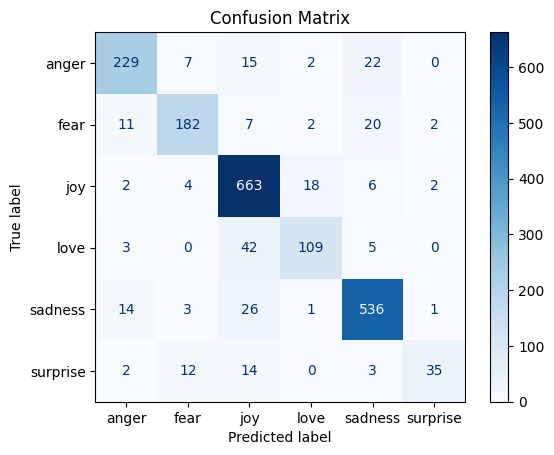

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(9,4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


/tmp/ipython-input-85-1306445985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=dataset, palette='Set2')
/tmp/ipython-input-85-1306445985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=dataset, palette='Set2')
/tmp/ipython-input-85-1306445985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=dataset, palette='Set2')


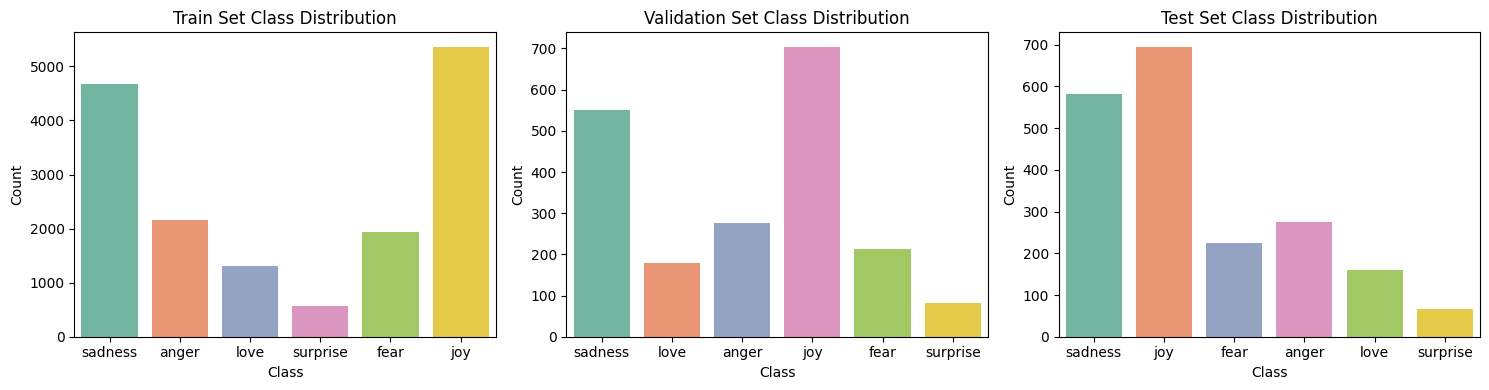

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    "Train": train_df,
    "Validation": val_df,
    "Test": test_df
}

plt.figure(figsize=(15, 4))

for i, (name, dataset) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)
    sns.countplot(x='label', data=dataset, palette='Set2')
    plt.title(f'{name} Set Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.grid(False)

plt.tight_layout()
plt.show()



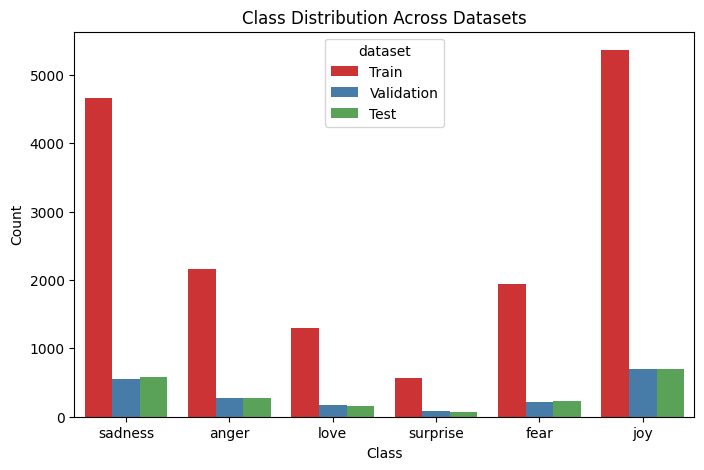

In [82]:
import pandas as pd

# Add a new column to each dataset to indicate its origin
train_df['dataset'] = 'Train'
val_df['dataset'] = 'Validation'
test_df['dataset'] = 'Test'

# Combine all datasets
combined_df = pd.concat([train_df, val_df, test_df])

plt.figure(figsize=(8,5))
sns.countplot(x='label', hue='dataset', data=combined_df, palette='Set1')
plt.title('Class Distribution Across Datasets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(False)
plt.show()


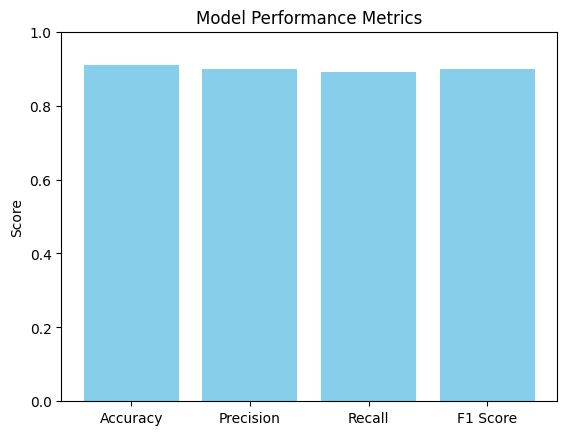

In [60]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.91, 0.90, 0.89, 0.899]  # Replace with your actual values

plt.bar(metrics, values, color='skyblue')
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()
